In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets

In [6]:
boston_data = datasets.load_boston()
print(boston_data.DESCR) #DESCR is the full description of the dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston_df = pd.DataFrame(boston_data.data)
boston_df.columns = boston_data.feature_names
boston_df_target = np.asarray(boston_data.target)
boston_df['Hourse Price'] = pd.Series(boston_df_target)
X = boston_df.iloc[:, :-1]
Y = boston_df.iloc[:, -1]
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Hourse Price
0,0.0063,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0691,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#splittling the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

print("Shape of train data of X = % s and Y = % s "%(x_train.shape, y_train.shape)) 
print("Shape of test data of X = % s and Y = % s"%(x_test.shape, y_test.shape)) 

Shape of train data of X = (379, 13) and Y = (379,) 
Shape of test data of X = (127, 13) and Y = (127,)


In [9]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()
enet.fit(x_test, y_test)
y_pred3 = enet.predict(x_test)

In [10]:
#Calculating0 the Mean Squared Error
mse3 = np.mean((y_pred3 - y_test)**2)
print("Mean Squared Error:", mse3)

Mean Squared Error: 26.425580767355974


In [11]:
"""putting together the coefficient and their corresponding variable names"""
enet_coef = pd.DataFrame()
enet_coef['Columns'] = x_train.columns
enet_coef['Coefficient Estimate'] = pd.Series(enet.coef_)
print(enet_coef)

    Columns  Coefficient Estimate
0      CRIM               -0.0745
1        ZN                0.0229
2     INDUS               -0.0485
3      CHAS                0.0000
4       NOX               -0.0000
5        RM                0.8111
6       AGE                0.0266
7       DIS               -0.7271
8       RAD                0.1644
9       TAX               -0.0076
10  PTRATIO               -0.7913
11        B                0.0077
12    LSTAT               -0.8341


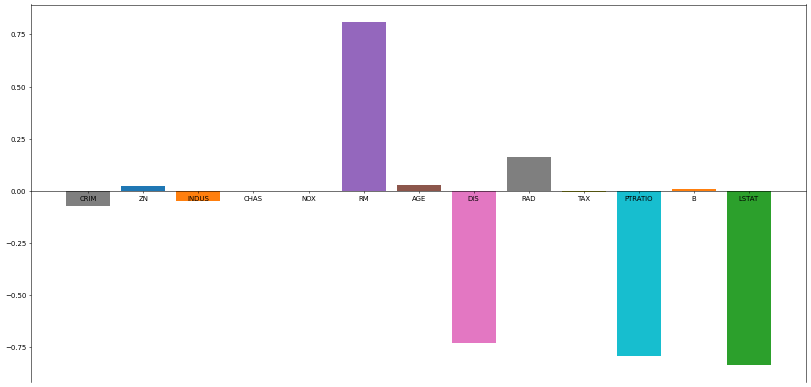

In [12]:
# plotting the coefficient score
fig, ax = plt.subplots(figsize=(20,10))
color =['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',  
        'tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive'] 

ax.bar(enet_coef["Columns"],  
enet_coef['Coefficient Estimate'],  
color = color) 
  
ax.spines['bottom'].set_position('zero') 
  
plt.style.use('ggplot') 
plt.show() 